In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motorbike-cost/sample_submission.csv
/kaggle/input/motorbike-cost/train.csv
/kaggle/input/motorbike-cost/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/motorbike-cost/train.csv')

In [3]:
test_data = pd.read_csv('/kaggle/input/motorbike-cost/test.csv')

In [4]:
train_data.head()

,bike_id,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,0,Bajaj V15 150cc 2017,2017,14000 Km,first owner,faridabad,57 kmpl,11.80 bhp,37000
1,1,Royal Enfield Classic 350cc 2015,2015,25350 Km,first owner,bangalore,35 kmpl,19.80 Bhp,103900
2,2,TVS Apache RTR 160cc 2019,2019,Mileage 60 Kmpl,first owner,etawah,60 Kmpl,15.2 bhp,85000
3,3,Royal Enfield Classic 500cc 2017,2017,14000 Km,first owner,bangalore,35 kmpl,27.20 bhp,140000
4,4,TVS Apache RTR 200 4V FI 2017,2017,Mileage 40 Kmpl,first owner,delhi,40 Kmpl,20.70 bhp,75000


In [5]:
'''from sklearn.preprocessing import OrdinalEncoder

features = ['model_name', 'kms_driven', 'owner', 'location', 'mileage', 'power']
encoder = OrdinalEncoder(
        handle_unknown='use_encoded_value', 
        unknown_value=-1
    ).fit(train_data[features])
train_data[features] = encoder.transform(train_data[features])
test_data[features] = encoder.transform(test_data[features])'''

"from sklearn.preprocessing import OrdinalEncoder\n\nfeatures = ['model_name', 'kms_driven', 'owner', 'location', 'mileage', 'power']\nencoder = OrdinalEncoder(\n        handle_unknown='use_encoded_value', \n        unknown_value=-1\n    ).fit(train_data[features])\ntrain_data[features] = encoder.transform(train_data[features])\ntest_data[features] = encoder.transform(test_data[features])"

In [6]:
train_data.head()

,bike_id,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,0,Bajaj V15 150cc 2017,2017,14000 Km,first owner,faridabad,57 kmpl,11.80 bhp,37000
1,1,Royal Enfield Classic 350cc 2015,2015,25350 Km,first owner,bangalore,35 kmpl,19.80 Bhp,103900
2,2,TVS Apache RTR 160cc 2019,2019,Mileage 60 Kmpl,first owner,etawah,60 Kmpl,15.2 bhp,85000
3,3,Royal Enfield Classic 500cc 2017,2017,14000 Km,first owner,bangalore,35 kmpl,27.20 bhp,140000
4,4,TVS Apache RTR 200 4V FI 2017,2017,Mileage 40 Kmpl,first owner,delhi,40 Kmpl,20.70 bhp,75000


In [7]:
train_data.owner.unique()

array(['first owner', 'second owner', 'fourth owner or more',
       'third owner'], dtype=object)

In [8]:
temp_data=train_data.copy(deep=True)

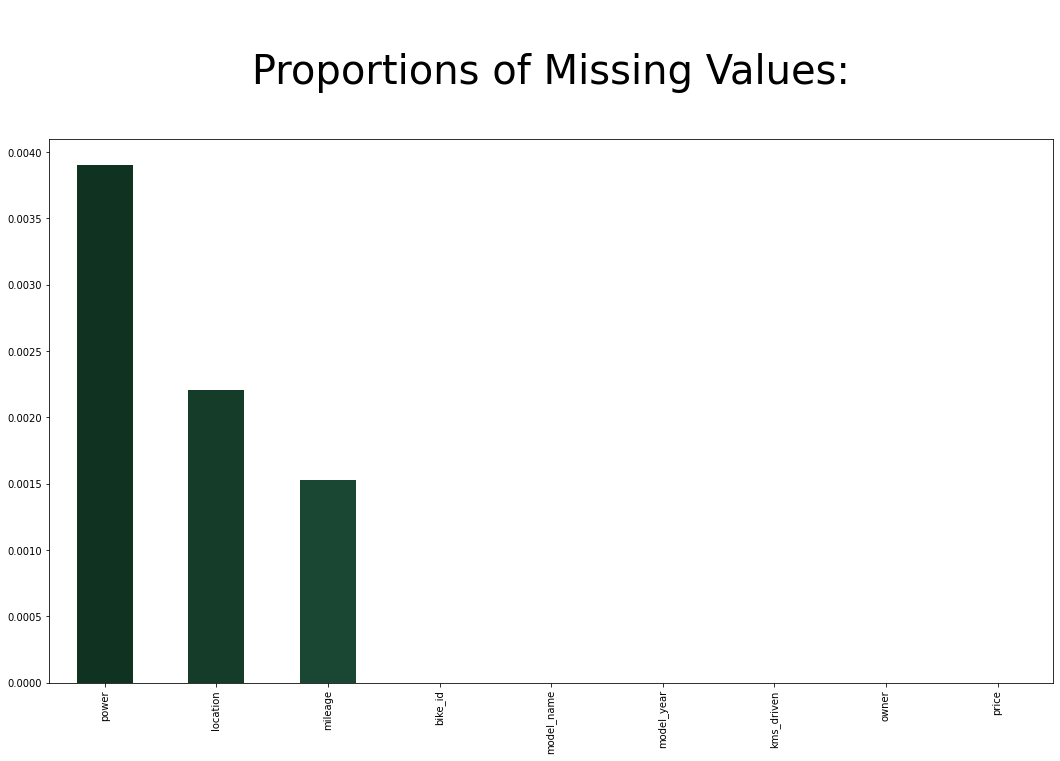

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
d=((temp_data.isnull().sum()/temp_data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2, rot=0.3, dark=0.15, light=0.9, reverse=True, n_colors=24),
        figsize=(18,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

cleaning kms_driven field

In [10]:
temp_data['kms_driven'].value_counts()
test_data['kms_driven'].value_counts()

Mileage 65 Kmpl    108
Mileage 35 Kmpl     63
Mileage 45 Kmpl     48
Mileage 58 Kmpl     40
Mileage 60 Kmpl     39
                  ... 
7606 Km              1
13300 Km             1
21100 Km             1
28661 Km             1
22455 Km             1
Name: kms_driven, Length: 593, dtype: int64

In [11]:
temp_data["kms_driven"]=temp_data["kms_driven"].str.replace("Km","")
test_data["kms_driven"]=temp_data["kms_driven"].str.replace("Km","")

In [12]:
temp_data

,bike_id,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,0,Bajaj V15 150cc 2017,2017,14000,first owner,faridabad,57 kmpl,11.80 bhp,37000
1,1,Royal Enfield Classic 350cc 2015,2015,25350,first owner,bangalore,35 kmpl,19.80 Bhp,103900
2,2,TVS Apache RTR 160cc 2019,2019,Mileage 60 pl,first owner,etawah,60 Kmpl,15.2 bhp,85000
3,3,Royal Enfield Classic 500cc 2017,2017,14000,first owner,bangalore,35 kmpl,27.20 bhp,140000
4,4,TVS Apache RTR 200 4V FI 2017,2017,Mileage 40 pl,first owner,delhi,40 Kmpl,20.70 bhp,75000
...,...,...,...,...,...,...,...,...,...
5887,5887,Royal Enfield Classic 350cc 2017,2017,24000,first owner,delhi,35 kmpl,19.80 bhp,130000
5888,5888,KTM Duke 250cc ABS 2019,2019,7976,first owner,faridabad,,29.60 bhp,170000
5889,5889,KTM RC 200cc 2018,2018,9876,first owner,delhi,35 kmpl,25.10 bhp,120000
5890,5890,Bajaj Discover150 150cc 2006,2006,Mileage 70 pl,first owner,delhi,70 Kmpl,13.0 PS,18000


In [13]:
import numpy as np
temp=temp_data.copy(deep=True)

In [14]:
m=temp['kms_driven'].str.startswith('M')
temp.loc[m,'kms_driven']=np.NaN


In [15]:
mT=test_data['kms_driven'].str.startswith('M')
test_data.loc[mT,'kms_driven']=np.NaN

In [16]:
temp['kms_driven'] = pd.to_numeric(temp['kms_driven'], errors='coerce')
test_data['kms_driven'] = pd.to_numeric(test_data['kms_driven'], errors='coerce')

In [17]:
temp['kms_driven'].isna().sum()

1485

In [18]:
temp['kms_driven'].fillna(value=temp['kms_driven'].mean(), inplace=True)
test_data['kms_driven'].fillna(value=test_data['kms_driven'].mean(), inplace=True)

In [19]:
temp['kms_driven']=temp['kms_driven'].astype('int64')

In [20]:
test_data['kms_driven']=test_data['kms_driven'].astype('int64')

In [21]:
backup1=temp.copy(deep=True)

In [22]:
temp=backup1.copy(deep=True)

# Cleaning Milage

In [23]:
temp['mileage'].unique()

array([' 57 kmpl', ' 35 kmpl', ' 60 Kmpl', ' 40 Kmpl', ' 22 kmpl',
       ' 38 kmpl', ' 38 Kmpl', ' 55 kmpl', ' 26kmpl', ' 45 Kmpl',
       ' 85 kmpl', ' 65 kmpl', ' ', ' 30 kmpl', ' 19 kmpl', ' 25Kmpl',
       ' 28 Kms', ' 65 Kmpl', ' 84 Kmpl', ' 20 kmpl', ' 26 kmpl',
       ' 74 Kmpl', ' 35 Kmpl', ' 42 Kmpl', ' 40 kmpl', ' 70 Kmpl',
       ' 37 Kmpl', ' 58 Kmpl', ' 17 kmpl', ' 37 kmpl', ' 45 kmpl',
       ' 89 kmpl', ' 95 kmpl', ' 42 kmpl', ' 32 kmpl', ' 67 kmpl',
       ' 75 kmpl', ' 63kmpl', ' 48 kmpl', ' 50 kmpl', ' 104 Kmpl',
       ' 69 kmpl', ' 53.72 kmpl', ' 52 Kmpl', ' 80 Kmpl', ' 81 kmpl',
       ' 53 kmpl', ' 43 kmpl', ' 45-60 kmpl', ' 55.47 kmpl',
       ' 45-55 kmpl', ' 29 Kmpl', ' 53kmpl', ' Liquid Cooled', ' 25 kmpl',
       ' 71 Kmpl', ' 83 kmpl', ' 56 kmpl', '  60 kmpl', ' 15 kmpl', nan,
       ' 84 kmpl', ' 5 kmpl', ' 18 kmpl', ' 64 kmpl', ' 52 kmpl',
       ' 60 kmpl', ' 65kmpl', ' 62 kmpl', ' 45-55', ' 18.86 kmpl',
       ' 82.4 Kmpl', ' 30 Kmpl', ' 12 kmpl', ' 15 

In [24]:
temp['mileage'].isna().sum()

9

In [25]:
temp1=temp.copy(deep=False)

In [26]:
temp1["mileage"]=temp1["mileage"].str.replace("kmpl","")

In [27]:
test_data["mileage"]=test_data["mileage"].str.replace("kmpl","")

In [28]:
temp1["mileage"]=temp1["mileage"].str.replace("Kmpl","")


In [29]:
test_data["mileage"]=test_data["mileage"].str.replace("Kmpl","")


In [30]:
temp1["mileage"]=temp1["mileage"].str.replace("Kmpl","")


In [31]:
test_data["mileage"]=test_data["mileage"].str.replace("Kmpl","")


In [32]:
temp1['mileage'] = pd.to_numeric(temp1['mileage'], errors='coerce')

In [33]:
test_data['mileage'] = pd.to_numeric(test_data['mileage'], errors='coerce')

In [34]:
temp1['mileage'].fillna(value=temp1['mileage'].mean(), inplace=True)
test_data['mileage'].fillna(value=test_data['mileage'].mean(), inplace=True)

In [35]:
temp1['mileage']=temp1['mileage'].astype('int64')
test_data['mileage']=test_data['mileage'].astype('int64')


## Cleaning Power Column


In [36]:
temp2=temp1.copy(deep=True)

temp2["power"]=temp2["power"].str.replace("bhp","")

In [37]:
test_data["power"]=test_data["power"].str.replace("bhp","")
test_data["power"]=test_data["power"].str.replace("Bhp","")
test_data['power'] = pd.to_numeric(test_data['power'], errors='coerce')

test_data['power'].fillna(value=test_data['power'].mean(), inplace=True)



In [38]:
temp2["power"]=temp2["power"].str.replace("Bhp","")

temp2['power'] = pd.to_numeric(temp2['power'], errors='coerce')

temp2['power'].isna().sum()

temp2['power']

temp2['power'].fillna(value=temp2['power'].mean(), inplace=True)

temp2['power'].isna().sum()

0

In [39]:
temp2.info()

temp2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_id     5892 non-null   int64  
 1   model_name  5892 non-null   object 
 2   model_year  5892 non-null   int64  
 3   kms_driven  5892 non-null   int64  
 4   owner       5892 non-null   object 
 5   location    5879 non-null   object 
 6   mileage     5892 non-null   int64  
 7   power       5892 non-null   float64
 8   price       5892 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 414.4+ KB


,bike_id,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,0,Bajaj V15 150cc 2017,2017,14000,first owner,faridabad,57,11.800000,37000
1,1,Royal Enfield Classic 350cc 2015,2015,25350,first owner,bangalore,35,19.800000,103900
2,2,TVS Apache RTR 160cc 2019,2019,22853,first owner,etawah,60,15.200000,85000
3,3,Royal Enfield Classic 500cc 2017,2017,14000,first owner,bangalore,35,27.200000,140000
4,4,TVS Apache RTR 200 4V FI 2017,2017,22853,first owner,delhi,40,20.700000,75000
...,...,...,...,...,...,...,...,...,...
5887,5887,Royal Enfield Classic 350cc 2017,2017,24000,first owner,delhi,35,19.800000,130000
5888,5888,KTM Duke 250cc ABS 2019,2019,7976,first owner,faridabad,44,29.600000,170000
5889,5889,KTM RC 200cc 2018,2018,9876,first owner,delhi,35,25.100000,120000
5890,5890,Bajaj Discover150 150cc 2006,2006,22853,first owner,delhi,70,21.222458,18000


# Cleaning Owner section


In [40]:
temp3=temp2.copy(deep=True)

temp3

temp3['owner'].value_counts()

first owner             5114
second owner             631
third owner               95
fourth owner or more      52
Name: owner, dtype: int64

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

temp3['owner']= label_encoder.fit_transform(temp3['owner'])

temp3

temp3['owner'].unique()

temp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_id     5892 non-null   int64  
 1   model_name  5892 non-null   object 
 2   model_year  5892 non-null   int64  
 3   kms_driven  5892 non-null   int64  
 4   owner       5892 non-null   int64  
 5   location    5879 non-null   object 
 6   mileage     5892 non-null   int64  
 7   power       5892 non-null   float64
 8   price       5892 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 414.4+ KB


In [42]:
test_data['owner']= label_encoder.fit_transform(test_data['owner'])


# best table for data analsis


In [43]:
temp4=temp3.copy(deep=True)

temp4

temp3=temp4.copy(deep=True)

# cleaning location


In [44]:

temp3['location']= label_encoder.fit_transform(temp3['location'])

temp3

,bike_id,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,0,Bajaj V15 150cc 2017,2017,14000,0,154,57,11.800000,37000
1,1,Royal Enfield Classic 350cc 2015,2015,25350,0,53,35,19.800000,103900
2,2,TVS Apache RTR 160cc 2019,2019,22853,0,153,60,15.200000,85000
3,3,Royal Enfield Classic 500cc 2017,2017,14000,0,53,35,27.200000,140000
4,4,TVS Apache RTR 200 4V FI 2017,2017,22853,0,137,40,20.700000,75000
...,...,...,...,...,...,...,...,...,...
5887,5887,Royal Enfield Classic 350cc 2017,2017,24000,0,137,35,19.800000,130000
5888,5888,KTM Duke 250cc ABS 2019,2019,7976,0,154,44,29.600000,170000
5889,5889,KTM RC 200cc 2018,2018,9876,0,137,35,25.100000,120000
5890,5890,Bajaj Discover150 150cc 2006,2006,22853,0,137,70,21.222458,18000


In [45]:
test_data['location']= label_encoder.fit_transform(test_data['location'])


## Cleaning model_name Column


In [46]:
l=[]
for j in temp3['model_name']:
  l1=j.split(" ");
  if(len(l1)==0):
    print("Yes")
  s=""
  for k in l1:
    if(len(k)!=0):
      if(k[0].isalpha()):
        s=s+" "+k
  s.strip()
  l.append(s)
print(l)
      

[' Bajaj V15', ' Royal Enfield Classic', ' TVS Apache RTR', ' Royal Enfield Classic', ' TVS Apache RTR FI', ' TVS Apache RTR Carburetor', ' TVS Apache RR310 Slipper Clutch', ' Bajaj Pulsar', ' Honda CBR', ' Hero Passion', ' KTM RC', ' TVS Apache RTR', ' TVS Star City', ' Bajaj Discover', ' Yamaha YZF-R15 V3 ABS', ' Suzuki Intruder', ' Hyosung GT250R', ' Benelli TNT ABS', ' Royal Enfield Machismo', ' UM Renegade Commando', ' Bajaj Dominar ABS', ' Bajaj Pulsar', ' Honda CD Dream', ' Yamaha YZF-R15 V3 ABS', ' Harley-Davidson Street', ' Royal Enfield Continental GT', ' TVS Victor Disc SBT', ' Bajaj Pulsar RS200 ABS BS6', ' Bajaj Pulsar AS200', ' Bajaj Avenger', ' Royal Enfield Classic S ABS', ' Royal Enfield Classic Edition', ' Hero Passion Xpro', ' BMW G R', ' Bajaj Discover', ' Bajaj Dominar ABS', ' Hero Ignitor', ' KTM RC', ' Royal Enfield Bullet Twinspark', ' Honda CB Unicorn', ' Honda CBF Stunner', ' Royal Enfield Thunderbird', ' Bajaj Pulsar RS200', ' Yamaha FZ', ' Kawasaki ER-6n', '

In [47]:
l=[]
for j in test_data['model_name']:
  l1=j.split(" ");
  if(len(l1)==0):
    print("Yes")
  s=""
  for k in l1:
    if(len(k)!=0):
      if(k[0].isalpha()):
        s=s+" "+k
  s.strip()
  l.append(s)

test_data['model']=l

In [48]:
l=[]
for j in temp3['model_name']:
  l1=j.split(" ");
  if(len(l1)==0):
    print("Yes")
  s=""
  for k in l1:
    if(len(k)!=0):
      if(k[0].isalpha()):
        s=s+" "+k
  s.strip()
  l.append(s)

temp3['model']=l

In [49]:
temp3['model_name'].unique()

array(['Bajaj V15 150cc 2017', 'Royal Enfield Classic 350cc 2015',
       'TVS Apache RTR 160cc 2019', ..., 'TVS Apache RTR 180cc 2012',
       'Hero CD Deluxe 100cc 2004', 'Bajaj Discover150 150cc 2006'],
      dtype=object)

In [50]:
l=[]
for j in temp3['model_name']:
  l1=j.split(" ");
  if(len(l1)==0):
    print("Yes")
  s=""
  for k in l1:
    if(len(k)>=2):
      if(k[-1]=='c' and k[-2]=='c'):
        j=0
        while(k[j]!='c'):
          s+=k[j]
          j=j+1
  l.append(s)
print(l)

['150', '350', '160', '500', '', '', '', '', '150', '100', '390', '180', '110', '', '', '150', '', '', '500', '', '', '150', '', '', '', '535', '110', '', '', '220', '', '', '110', '', '150', '', '125', '200', '350', '150', '125', '350', '', '150', '650', '150', '350', '', '', '350', '', '125', '150', '390', '350', '100', '100', '180', '', '150', '500', '150', '', '150', '', '350', '125', '150', '110', '', '100', '125', '150', '', '350', '', '150', '223', '', '350', '', '', '250', '220', '', '350', '150', '350', '150', '150', 'ES-100', '110', '', '', '350', '150', '500', '', '', '', '350', '', '150', '', '125', '', '150', '160', '150', '', '110', '150', '150', '', '150', '200', '', '100', '110', '', '125', '150', '150', '', '350', '350', '100', '150', '500', '100', '150', '150', '', '125', '', '', '350', '150', '', '', '', '100', '350', '350', '125', '350', '350', '150', '110', '250', '100', '220', '350', '100', '', '', '', '', '150', '220', '200', '', '223', '', '', '150', '150', '160

In [51]:
l=[]
for j in test_data['model_name']:
  l1=j.split(" ");
  if(len(l1)==0):
    print("Yes")
  s=""
  for k in l1:
    if(len(k)>=2):
      if(k[-1]=='c' and k[-2]=='c'):
        j=0
        while(k[j]!='c'):
          s+=k[j]
          j=j+1
  l.append(s)
test_data['cc']=l


In [52]:
l=[]
for j in temp3['model_name']:
  l1=j.split(" ");
  if(len(l1)==0):
    print("Yes")
  s=""
  for k in l1:
    if(len(k)>=2):
      if(k[-1]=='c' and k[-2]=='c'):
        j=0
        while(k[j]!='c'):
          s+=k[j]
          j=j+1
  l.append(s)
temp3['cc']=l

temp3

,bike_id,model_name,model_year,kms_driven,owner,location,mileage,power,price,model,cc
0,0,Bajaj V15 150cc 2017,2017,14000,0,154,57,11.800000,37000,Bajaj V15,150
1,1,Royal Enfield Classic 350cc 2015,2015,25350,0,53,35,19.800000,103900,Royal Enfield Classic,350
2,2,TVS Apache RTR 160cc 2019,2019,22853,0,153,60,15.200000,85000,TVS Apache RTR,160
3,3,Royal Enfield Classic 500cc 2017,2017,14000,0,53,35,27.200000,140000,Royal Enfield Classic,500
4,4,TVS Apache RTR 200 4V FI 2017,2017,22853,0,137,40,20.700000,75000,TVS Apache RTR FI,
...,...,...,...,...,...,...,...,...,...,...,...
5887,5887,Royal Enfield Classic 350cc 2017,2017,24000,0,137,35,19.800000,130000,Royal Enfield Classic,350
5888,5888,KTM Duke 250cc ABS 2019,2019,7976,0,154,44,29.600000,170000,KTM Duke ABS,250
5889,5889,KTM RC 200cc 2018,2018,9876,0,137,35,25.100000,120000,KTM RC,200
5890,5890,Bajaj Discover150 150cc 2006,2006,22853,0,137,70,21.222458,18000,Bajaj Discover150,150


In [53]:
temp3['cc'] = pd.to_numeric(temp3['cc'], errors='coerce')

temp3['cc'].isna().sum()

temp3['cc'].fillna(value=temp3['cc'].mean(), inplace=True)

temp3

,bike_id,model_name,model_year,kms_driven,owner,location,mileage,power,price,model,cc
0,0,Bajaj V15 150cc 2017,2017,14000,0,154,57,11.800000,37000,Bajaj V15,150.000000
1,1,Royal Enfield Classic 350cc 2015,2015,25350,0,53,35,19.800000,103900,Royal Enfield Classic,350.000000
2,2,TVS Apache RTR 160cc 2019,2019,22853,0,153,60,15.200000,85000,TVS Apache RTR,160.000000
3,3,Royal Enfield Classic 500cc 2017,2017,14000,0,53,35,27.200000,140000,Royal Enfield Classic,500.000000
4,4,TVS Apache RTR 200 4V FI 2017,2017,22853,0,137,40,20.700000,75000,TVS Apache RTR FI,240.036062
...,...,...,...,...,...,...,...,...,...,...,...
5887,5887,Royal Enfield Classic 350cc 2017,2017,24000,0,137,35,19.800000,130000,Royal Enfield Classic,350.000000
5888,5888,KTM Duke 250cc ABS 2019,2019,7976,0,154,44,29.600000,170000,KTM Duke ABS,250.000000
5889,5889,KTM RC 200cc 2018,2018,9876,0,137,35,25.100000,120000,KTM RC,200.000000
5890,5890,Bajaj Discover150 150cc 2006,2006,22853,0,137,70,21.222458,18000,Bajaj Discover150,150.000000


In [54]:
test_data['cc'] = pd.to_numeric(test_data['cc'], errors='coerce')


test_data['cc'].fillna(value=test_data['cc'].mean(), inplace=True)
test_data.drop(columns=['model_name'],inplace=True)


In [55]:
temp3.drop(columns=['model_name'],inplace=True)



temp3

,bike_id,model_year,kms_driven,owner,location,mileage,power,price,model,cc
0,0,2017,14000,0,154,57,11.800000,37000,Bajaj V15,150.000000
1,1,2015,25350,0,53,35,19.800000,103900,Royal Enfield Classic,350.000000
2,2,2019,22853,0,153,60,15.200000,85000,TVS Apache RTR,160.000000
3,3,2017,14000,0,53,35,27.200000,140000,Royal Enfield Classic,500.000000
4,4,2017,22853,0,137,40,20.700000,75000,TVS Apache RTR FI,240.036062
...,...,...,...,...,...,...,...,...,...,...
5887,5887,2017,24000,0,137,35,19.800000,130000,Royal Enfield Classic,350.000000
5888,5888,2019,7976,0,154,44,29.600000,170000,KTM Duke ABS,250.000000
5889,5889,2018,9876,0,137,35,25.100000,120000,KTM RC,200.000000
5890,5890,2006,22853,0,137,70,21.222458,18000,Bajaj Discover150,150.000000


In [56]:
temp3['model'].unique()

temp3['model']= label_encoder.fit_transform(temp3['model'])

temp3

,bike_id,model_year,kms_driven,owner,location,mileage,power,price,model,cc
0,0,2017,14000,0,154,57,11.800000,37000,67,150.000000
1,1,2015,25350,0,53,35,19.800000,103900,295,350.000000
2,2,2019,22853,0,153,60,15.200000,85000,375,160.000000
3,3,2017,14000,0,53,35,27.200000,140000,295,500.000000
4,4,2017,22853,0,137,40,20.700000,75000,391,240.036062
...,...,...,...,...,...,...,...,...,...,...
5887,5887,2017,24000,0,137,35,19.800000,130000,295,350.000000
5888,5888,2019,7976,0,154,44,29.600000,170000,255,250.000000
5889,5889,2018,9876,0,137,35,25.100000,120000,258,200.000000
5890,5890,2006,22853,0,137,70,21.222458,18000,22,150.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

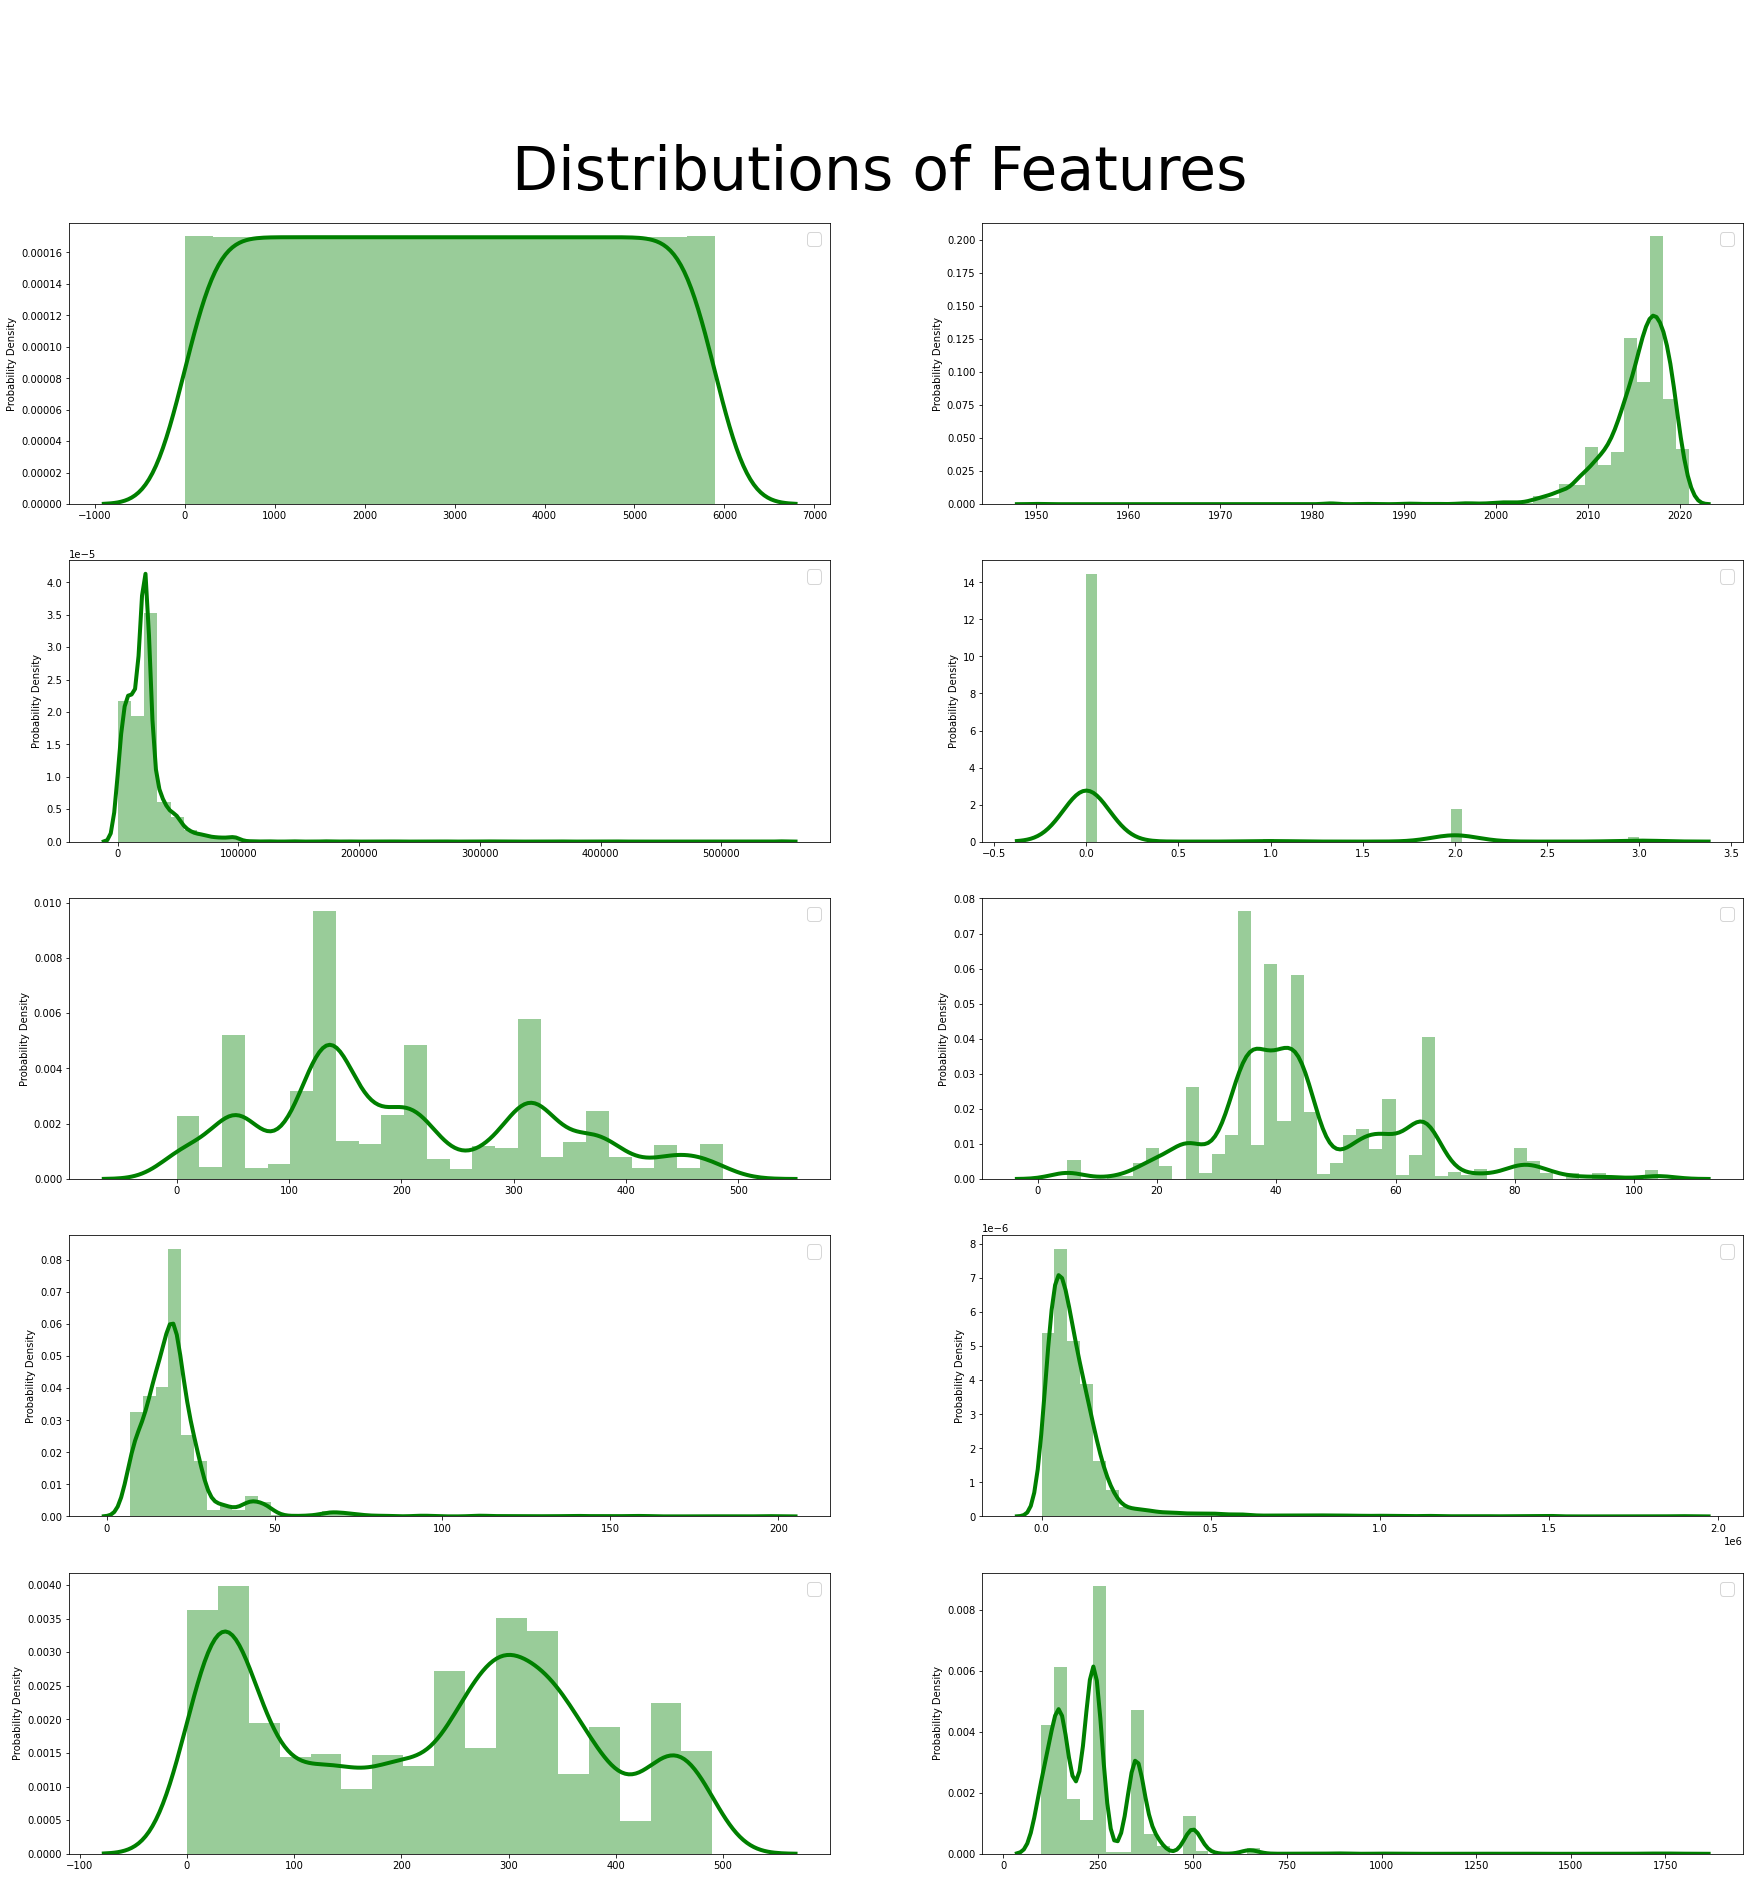

In [57]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize= (30, 30))
figure.suptitle('\n\nDistributions of Features', fontsize=60)

for index, column in enumerate(temp3):
    
    i,j = (index // n_cols), (index % n_cols)
    
    fig=sns.distplot(temp3[column], color="g", norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

In [58]:
test_data['model']= label_encoder.fit_transform(test_data['model'])


In [59]:
temp3['model'].value_counts()

temp3

,bike_id,model_year,kms_driven,owner,location,mileage,power,price,model,cc
0,0,2017,14000,0,154,57,11.800000,37000,67,150.000000
1,1,2015,25350,0,53,35,19.800000,103900,295,350.000000
2,2,2019,22853,0,153,60,15.200000,85000,375,160.000000
3,3,2017,14000,0,53,35,27.200000,140000,295,500.000000
4,4,2017,22853,0,137,40,20.700000,75000,391,240.036062
...,...,...,...,...,...,...,...,...,...,...
5887,5887,2017,24000,0,137,35,19.800000,130000,295,350.000000
5888,5888,2019,7976,0,154,44,29.600000,170000,255,250.000000
5889,5889,2018,9876,0,137,35,25.100000,120000,258,200.000000
5890,5890,2006,22853,0,137,70,21.222458,18000,22,150.000000


In [60]:
temp3.drop(columns=['bike_id'],inplace=True)

temp3

,model_year,kms_driven,owner,location,mileage,power,price,model,cc
0,2017,14000,0,154,57,11.800000,37000,67,150.000000
1,2015,25350,0,53,35,19.800000,103900,295,350.000000
2,2019,22853,0,153,60,15.200000,85000,375,160.000000
3,2017,14000,0,53,35,27.200000,140000,295,500.000000
4,2017,22853,0,137,40,20.700000,75000,391,240.036062
...,...,...,...,...,...,...,...,...,...
5887,2017,24000,0,137,35,19.800000,130000,295,350.000000
5888,2019,7976,0,154,44,29.600000,170000,255,250.000000
5889,2018,9876,0,137,35,25.100000,120000,258,200.000000
5890,2006,22853,0,137,70,21.222458,18000,22,150.000000


## Data Analysis using Graphs

In [61]:
#temp4
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

filter=temp3[temp3.model_year>2005]
fig = px.bar(x=filter['mileage'], y=filter['price']) 
  
# showing the plot
fig.show()

In [62]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='kms_driven', ylabel='model_year'>,
        <AxesSubplot:xlabel='owner', ylabel='model_year'>,
        <AxesSubplot:xlabel='location', ylabel='model_year'>,
        <AxesSubplot:xlabel='mileage', ylabel='model_year'>,
        <AxesSubplot:xlabel='power', ylabel='model_year'>,
        <AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='model', ylabel='model_year'>,
        <AxesSubplot:xlabel='cc', ylabel='model_year'>],
       [<AxesSubplot:xlabel='model_year', ylabel='kms_driven'>,
        <AxesSubplot:xlabel='kms_driven', ylabel='kms_driven'>,
        <AxesSubplot:xlabel='owner', ylabel='kms_driven'>,
        <AxesSubplot:xlabel='location', ylabel='kms_driven'>,
        <AxesSubplot:xlabel='mileage', ylabel='kms_driven'>,
        <AxesSubplot:xlabel='power', ylabel='kms_driven'>,
        <AxesSubplot:xlabel='price', ylabel='kms_driven'>,
        <AxesSubplot:xlabel=

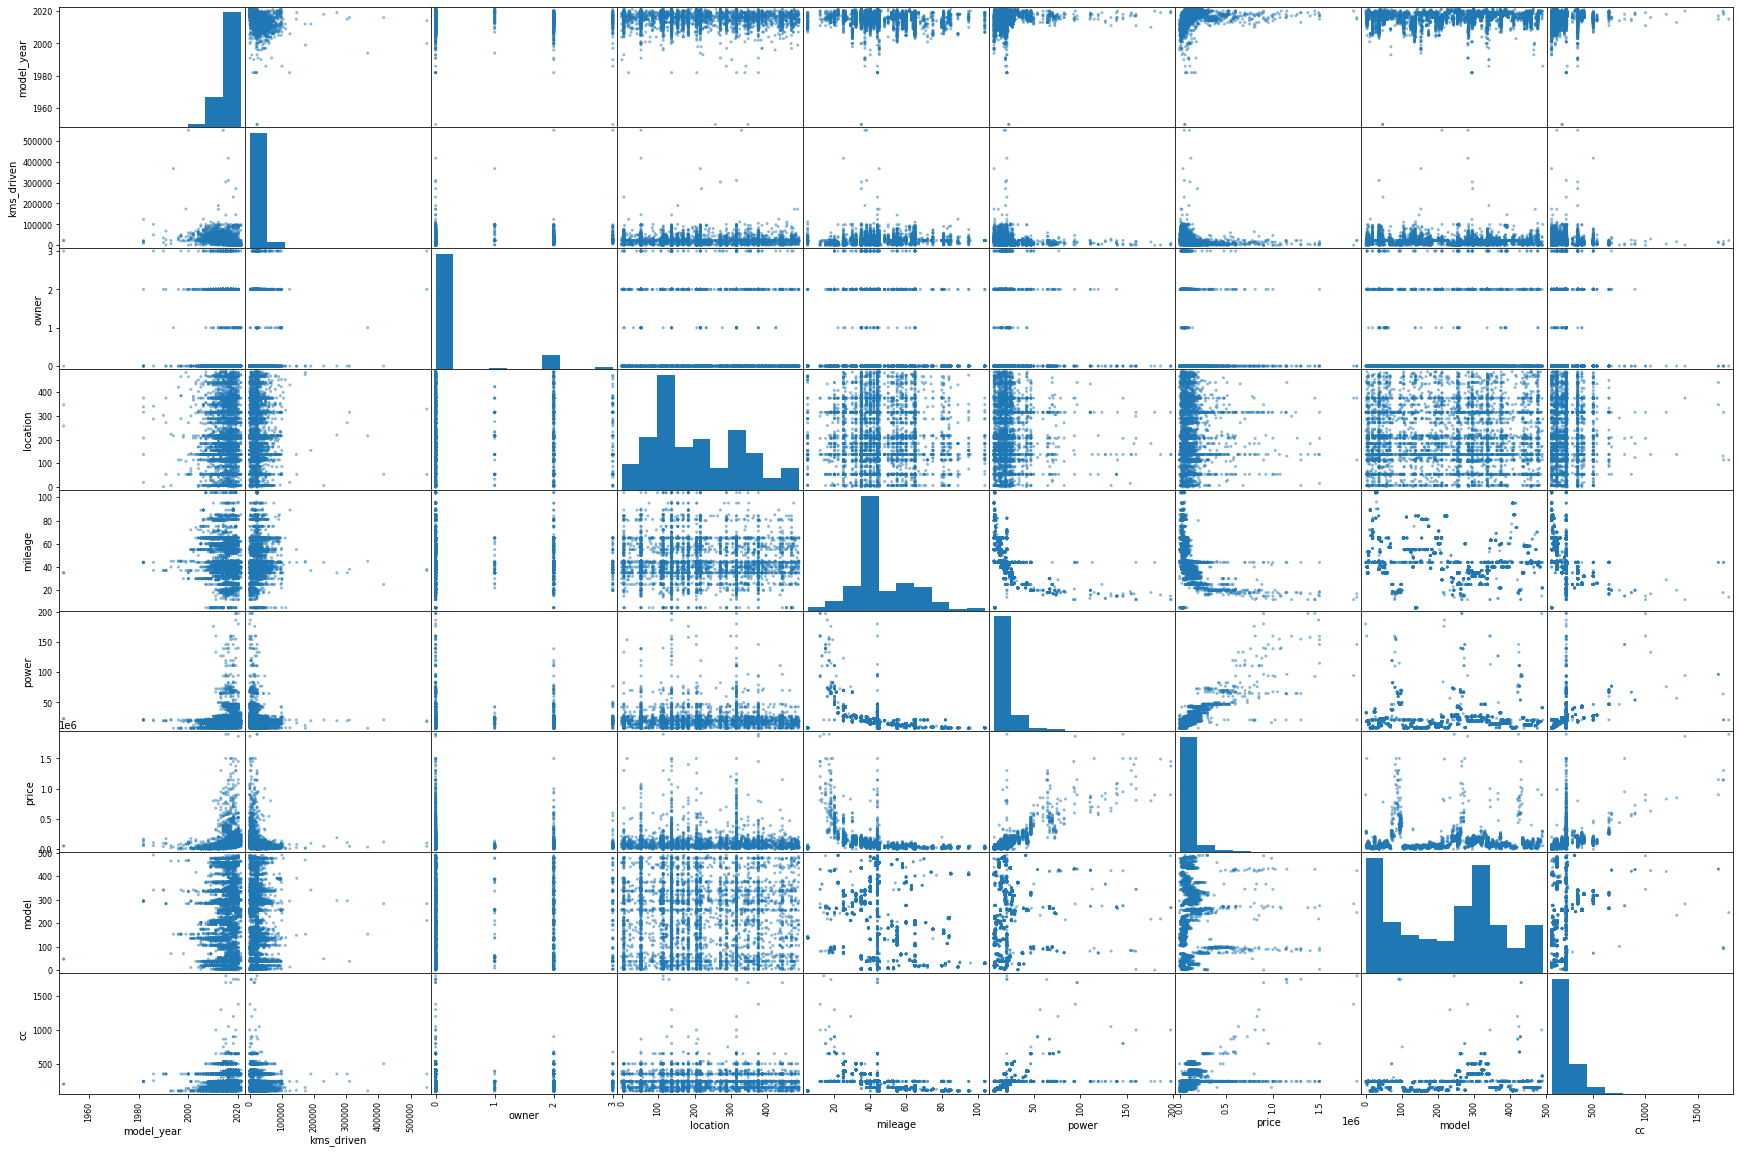

In [63]:
scatter_matrix(temp3[temp3.columns],figsize=(30,20))

In [64]:
fig = px.scatter(x=filter['model_year'], y=filter['price']) 
  
# showing the plot
fig.show()

<AxesSubplot:>

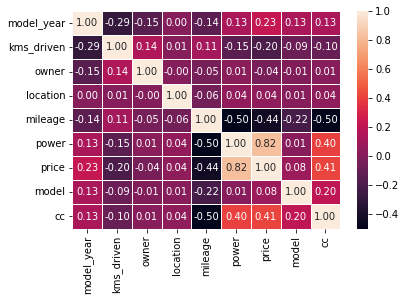

In [65]:
import seaborn as sns
plt.figure()
sns.heatmap(temp3.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [66]:
temp3.corr()

,model_year,kms_driven,owner,location,mileage,power,price,model,cc
model_year,1.000000,-0.294425,-0.154503,0.002309,-0.143869,0.127657,0.227872,0.126434,0.128813
kms_driven,-0.294425,1.000000,0.144828,0.006896,0.111490,-0.149548,-0.203579,-0.087075,-0.104032
owner,-0.154503,0.144828,1.000000,-0.002719,-0.048359,0.014791,-0.043050,-0.012680,0.009222
location,0.002309,0.006896,-0.002719,1.000000,-0.061831,0.043479,0.039924,0.011698,0.042127
mileage,-0.143869,0.111490,-0.048359,-0.061831,1.000000,-0.503905,-0.437533,-0.222864,-0.503799
power,0.127657,-0.149548,0.014791,0.043479,-0.503905,1.000000,0.824142,0.012588,0.401070
price,0.227872,-0.203579,-0.043050,0.039924,-0.437533,0.824142,1.000000,0.082961,0.414813
model,0.126434,-0.087075,-0.012680,0.011698,-0.222864,0.012588,0.082961,1.000000,0.203508
cc,0.128813,-0.104032,0.009222,0.042127,-0.503799,0.401070,0.414813,0.203508,1.000000


## Prediction

In [67]:
temp5=temp3.copy(deep=True)

temp5

,model_year,kms_driven,owner,location,mileage,power,price,model,cc
0,2017,14000,0,154,57,11.800000,37000,67,150.000000
1,2015,25350,0,53,35,19.800000,103900,295,350.000000
2,2019,22853,0,153,60,15.200000,85000,375,160.000000
3,2017,14000,0,53,35,27.200000,140000,295,500.000000
4,2017,22853,0,137,40,20.700000,75000,391,240.036062
...,...,...,...,...,...,...,...,...,...
5887,2017,24000,0,137,35,19.800000,130000,295,350.000000
5888,2019,7976,0,154,44,29.600000,170000,255,250.000000
5889,2018,9876,0,137,35,25.100000,120000,258,200.000000
5890,2006,22853,0,137,70,21.222458,18000,22,150.000000


In [68]:
temp5['model'].unique()

array([ 67, 295, 375, 391, 379, 374,  37, 211, 135, 258, 410,  19, 479,
       363, 243,  74, 333, 434,  25, 219,  95, 318, 418,  60,  41,   4,
       313, 307, 148,   2, 127, 291, 203, 210, 337,  58, 439, 262, 472,
       341, 435, 457, 261, 309,  13, 407,   5, 476, 201,  16, 351,  59,
       174, 216, 360, 425,   6, 458, 132,  52,   8, 254, 449,  31, 361,
        53, 302, 298, 384,  10, 473, 179, 190, 160, 347, 442, 296, 359,
       161, 253, 332,  28, 175, 224, 447, 153, 155, 380, 100, 182, 136,
       234, 443, 373, 285,   9,  47,  32, 125, 329, 436, 488, 446, 339,
       131, 252, 346, 365, 376, 204,  76,  48, 156, 164, 202, 477, 348,
       107, 478, 141, 228, 192, 191, 166, 271, 205, 194,  73, 185, 419,
       113, 387, 275, 209, 294, 274, 371, 144, 138, 241, 214, 284, 165,
       200, 451, 196,   7,  98, 453,  36, 212, 321,  40, 176, 255, 437,
       137, 423,  64, 232, 322, 440, 411, 462, 310, 198,  24, 340, 314,
       338, 231,  72, 489, 283,  65, 393, 105, 289,  43,  61, 19

In [69]:
#temp5.drop(columns=['location','model','owner'],inplace=True)

X=temp5.drop(columns=['price'])
Y=temp5['price']

In [70]:
'''X=train_data.drop(columns=['price'])
Y=train_data['price']'''

"X=train_data.drop(columns=['price'])\nY=train_data['price']"

In [71]:
#X['model_year'] = 2022 - X['model_year'] 

In [72]:
X

,model_year,kms_driven,owner,location,mileage,power,model,cc
0,2017,14000,0,154,57,11.800000,67,150.000000
1,2015,25350,0,53,35,19.800000,295,350.000000
2,2019,22853,0,153,60,15.200000,375,160.000000
3,2017,14000,0,53,35,27.200000,295,500.000000
4,2017,22853,0,137,40,20.700000,391,240.036062
...,...,...,...,...,...,...,...,...
5887,2017,24000,0,137,35,19.800000,295,350.000000
5888,2019,7976,0,154,44,29.600000,255,250.000000
5889,2018,9876,0,137,35,25.100000,258,200.000000
5890,2006,22853,0,137,70,21.222458,22,150.000000


In [73]:
ids = pd.DataFrame(data={"price":test_data["bike_id"]})

In [74]:
test_data.drop(columns=['bike_id'], axis=1, inplace=True)

In [75]:
X['model_year'] = 2022 - X['model_year'] 
test_data['model_year'] = 2022 - test_data['model_year'] 

In [76]:
for column in test_data.columns:
    test_data[column] = test_data[column]  / test_data[column].abs().max()

In [77]:
'''from sklearn.preprocessing import StandardScaler
standardSc = StandardScaler()
X = standardSc.fit_transform(X) # Computes the mean and standard deviation to scale, fit the scaled data, then transform it.'''

'from sklearn.preprocessing import StandardScaler\nstandardSc = StandardScaler()\nX = standardSc.fit_transform(X) # Computes the mean and standard deviation to scale, fit the scaled data, then transform it.'

In [78]:
'''from sklearn.preprocessing import StandardScaler
standardSc = StandardScaler()
test_data = standardSc.fit_transform(test_data) # Computes the mean and standard deviation to scale, fit the scaled data, then transform it.'''

'from sklearn.preprocessing import StandardScaler\nstandardSc = StandardScaler()\ntest_data = standardSc.fit_transform(test_data) # Computes the mean and standard deviation to scale, fit the scaled data, then transform it.'

In [79]:
for column in X.columns:
    X[column] = X[column]  / X[column].abs().max()

In [80]:
test_data

,model_year,kms_driven,owner,location,mileage,power,model,cc
0,0.057692,0.025455,0.0,0.280899,0.432692,0.109127,0.694190,0.291667
1,0.230769,0.046091,0.0,0.112360,0.625000,0.082672,0.082569,0.150000
2,0.307692,0.042189,0.0,0.112360,0.384615,0.104718,0.006116,0.150000
3,0.057692,0.025455,0.0,0.865169,0.432692,0.103064,0.981651,0.195927
4,0.076923,0.042189,0.0,0.423221,0.605769,0.077160,0.743119,0.125000
...,...,...,...,...,...,...,...,...
1960,0.038462,0.051818,0.0,0.026217,0.336538,0.138338,0.535168,0.166667
1961,0.134615,0.101818,0.0,0.280899,0.153846,0.115727,0.379205,0.195927
1962,0.038462,0.042189,0.0,0.344569,0.432692,0.165344,0.516820,0.275000
1963,0.230769,0.002545,0.0,0.018727,0.625000,0.115727,0.045872,0.112500


In [81]:
X

,model_year,kms_driven,owner,location,mileage,power,model,cc
0,0.069444,0.025455,0.0,0.316872,0.548077,0.059807,0.136735,0.083333
1,0.097222,0.046091,0.0,0.109053,0.336538,0.100355,0.602041,0.194444
2,0.041667,0.041551,0.0,0.314815,0.576923,0.077040,0.765306,0.088889
3,0.069444,0.025455,0.0,0.109053,0.336538,0.137861,0.602041,0.277778
4,0.069444,0.041551,0.0,0.281893,0.384615,0.104916,0.797959,0.133353
...,...,...,...,...,...,...,...,...
5887,0.069444,0.043636,0.0,0.281893,0.336538,0.100355,0.602041,0.194444
5888,0.041667,0.014502,0.0,0.316872,0.423077,0.150025,0.520408,0.138889
5889,0.055556,0.017956,0.0,0.281893,0.336538,0.127217,0.526531,0.111111
5890,0.222222,0.041551,0.0,0.281893,0.673077,0.107564,0.044898,0.083333


In [82]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.1, random_state = 12)'''

'from sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.1, random_state = 12)'

In [83]:
'''from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X, Y)'''

"from sklearn.model_selection import GridSearchCV\n\nmodel = CatBoostRegressor()\nparameters = {'depth' : [6,8,10],\n              'learning_rate' : [0.01, 0.05, 0.1],\n              'iterations'    : [30, 50, 100]\n              }\n\ngrid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)\ngrid.fit(X, Y)"

In [84]:
from catboost import CatBoostRegressor
'''clf = CatBoostRegressor(objective= 'MultiRMSE', learning_rate= 0.0034482435681627817, colsample_bylevel= 0.08045933763195665, max_depth= 13, boosting_type= 'Plain', bootstrap_type= 'Bernoulli', subsample= 0.1389037684424913)
clf.fit(X, Y)'''

"clf = CatBoostRegressor(objective= 'MultiRMSE', learning_rate= 0.0034482435681627817, colsample_bylevel= 0.08045933763195665, max_depth= 13, boosting_type= 'Plain', bootstrap_type= 'Bernoulli', subsample= 0.1389037684424913)\nclf.fit(X, Y)"

In [85]:
'''output=pd.DataFrame(data={"bike_id":ids["price"],"price":clf.predict(test_data)})
output.to_csv("optuna.csv",index=False)
output.head()'''

'output=pd.DataFrame(data={"bike_id":ids["price"],"price":clf.predict(test_data)})\noutput.to_csv("optuna.csv",index=False)\noutput.head()'

In [86]:
from catboost import CatBoostRegressor

In [87]:
model = CatBoostRegressor(learning_rate=0.03, iterations=500)

In [88]:
model.fit(X,Y)

0:	learn: 135419.1874658	total: 59.3ms	remaining: 29.6s
1:	learn: 132823.4777786	total: 61.3ms	remaining: 15.3s
2:	learn: 130310.5740300	total: 63.2ms	remaining: 10.5s
3:	learn: 127874.9134338	total: 65ms	remaining: 8.06s
4:	learn: 125378.4368289	total: 66.7ms	remaining: 6.6s
5:	learn: 122992.9588159	total: 68.5ms	remaining: 5.64s
6:	learn: 120878.8443858	total: 70.5ms	remaining: 4.96s
7:	learn: 118617.4062068	total: 72.5ms	remaining: 4.46s
8:	learn: 116411.3384655	total: 74.5ms	remaining: 4.07s
9:	learn: 114298.7941067	total: 76.5ms	remaining: 3.75s
10:	learn: 112314.7661015	total: 78.6ms	remaining: 3.49s
11:	learn: 110408.7722390	total: 80.5ms	remaining: 3.27s
12:	learn: 108586.1870139	total: 82.5ms	remaining: 3.09s
13:	learn: 106716.3682204	total: 84.5ms	remaining: 2.93s
14:	learn: 104863.3702413	total: 86.4ms	remaining: 2.79s
15:	learn: 103185.8669718	total: 88.2ms	remaining: 2.67s
16:	learn: 101627.5649343	total: 90ms	remaining: 2.56s
17:	learn: 100175.6586424	total: 91.8ms	remain

In [89]:
output=pd.DataFrame(data={"bike_id":ids["price"],"price":model.predict(test_data)})
output.to_csv("predictions2.csv",index=False)
output.head()

,bike_id,price
0,0,129205.290566
1,1,32697.782045
2,2,107792.149237
3,3,145330.024524
4,4,55920.049495


In [90]:
# X.drop(columns=['location','model'],inplace=True)

In [91]:
# X.drop(columns=['location','model'],inplace=True)

In [92]:
# test_data.drop(columns=['location','model'],inplace=True)

In [93]:
'''import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense




model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation='relu', input_shape=(5,)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, Y, epochs=50)

model.save('saved_model.h5')'''

"import tensorflow as tf\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\nfrom keras.models import Sequential\nfrom keras.layers import Activation, Dense\n\n\n\n\nmodel = keras.models.Sequential()\nmodel.add(keras.layers.Dense(5, activation='relu', input_shape=(5,)))\nmodel.add(keras.layers.Dense(512, activation='relu'))\nmodel.add(keras.layers.Dense(128, activation='relu'))\nmodel.add(keras.layers.Dense(64, activation='relu'))\nmodel.add(keras.layers.Dense(32, activation='relu'))\nmodel.add(keras.layers.Dense(1))\n\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n\nmodel.fit(X, Y, epochs=50)\n\nmodel.save('saved_model.h5')"

In [94]:
Y

0        37000
1       103900
2        85000
3       140000
4        75000
         ...  
5887    130000
5888    170000
5889    120000
5890     18000
5891     35000
Name: price, Length: 5892, dtype: int64

In [95]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [96]:
output=pd.DataFrame(data={"bike_id":ids["price"],"price":my_model.predict(test_data)})
output.to_csv("predictions3.csv",index=False)
output.head()

,bike_id,price
0,0,118040.320312
1,1,14385.858398
2,2,108798.335938
3,3,166253.390625
4,4,50266.136719
